<a href="https://colab.research.google.com/github/lemonbuilder/EXPLORATION/blob/main/E-02/%5BE_02%5DPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [E-02] PREDICTION


<br>

< 목 차 >

###I.   서 론

###II.  본 론

1.   **당뇨병 수치 예측** 

    1) 데이터 분석  
    2) 함수 구현을 통한 학습 및 예측  
    3) 라이브러리를 활용한 학습 및 예측  
    4) 소결  

2.   **자전거 대여량 예측**  

    1) 데이터 분석  
    2) 학습 및 예측  
    3) 소결   


###III. 결 론

<br><br><br>





---

# **I.  서 론**

<br>


####**[ 배경 및 의의 ]**

우리가 흔히 다루는 데이터셋 안에는 많은 유형의 정보가 포함되어 있다. 그 중에는 우리가 알고자 하는 내용과 관련이 높은 정보가 있는가 하면, 그렇지 않은 정보도 있다. 데이터를 적절히 활용하여 원하는 바를 얻기 위해서는 데이터 간의 상관관계를 이해하고, 결과에 영향을 미치는 요소들을 통제∙조정할 필요가 있다.

이번 Exploration에서는 데이터를 기반으로 특정수치를 예측하는 방법을 알아본다. 예측을 위해서는 예측 대상과 데이터 간에 개연성이 있어야 한다. 한 변수가 다른 변수와 선형적으로 연관되어 있다면, 우리는 그러한 관계를 토대로 특정값을 추론하는 것이 가능할 것이다. 또한 예측값과 실제 수치 사이의 오차를 통해 예측의 정확도를 추측하고 더 나은 값을 찾아나가는 학습방식을 익혀본다. 

<br>

####**[ 목표 ]**
*   머신러닝을 통한 예측구조의 이해
*   변수 간 상관관계에 대한 숙지
*   예측치와 실제 데이터 간의 격차를 줄이는 원리 학습
*   데이터셋을 활용한 특정값 예측 실시
*   예측 결과의 타당성 고찰
*   해결되지 않은 부분에 대한 인지 및 향후 보완사항 검토


<br><br><br>




---

# **II. 본 론**




##**1. 당뇨병 수치 예측**

<br><br>

###**1) 데이터 분석**

<br>

첫 번째 프로젝트는 scikit-learn에서 제공하는 당뇨병 환자 데이터를 사용하여 당뇨병 수치를 예측하는 것이다. 데이터 셋팅을 위해 필요한 모듈을 import하고, 해당 테이터를 로딩한다. 데이터를 변수에 저장한 후 전반적인 내용을 파악했다.  

총 442개의 데이터가 각각 10가지의 값을 가지고 있다. 나이(age), 성별(sex), 체질량지수(bmi), 혈압(bp), 혈청 정보(s1~s6) 등과 같은 환자의 특성이 나와있다. 

DESCR을 통해 확인한 결과, target(label)에는 환자별 질병 진행률을 정량적으로 측정한 값이 담겨있다고 한다.



In [126]:
'''당뇨병(diabetes) 환자 데이터'''
from sklearn.datasets import load_diabetes
import numpy as np 

diabetes=load_diabetes()

# 데이터 할당
df_x=diabetes.data
df_y=diabetes.target

# 데이터 개요 확인
print(f'- x.shape: {df_x.shape}')
print(f'- y.shape: {df_y.shape}')
print(f'- data 정보: {diabetes.keys()}') 
print(f'- feature: {diabetes.feature_names}') 

- x.shape: (442, 10)
- y.shape: (442,)
- data 정보: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
- feature: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [127]:
# 데이터 세부사항 확인
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [128]:
# 자료형 변환; data frame
import pandas as pd
diabetes_df = pd.DataFrame(data=df_x, columns=diabetes.feature_names)
diabetes_df["label"] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


<br><br>

###**2) 함수 구현을 통한 학습 및 예측**

<br>

여기서 **우리가 풀고자 하는 문제**는 무엇인가?

나이, 성별, 체질량지수 등과 같은 환자의 특성을 토대로 당뇨병 진행률 값(당뇨수치)을 예측하는 것이다. 이에 대한 **전제사항**은 다음과 같다.



*   환자의 특성(나이, 성별, 체질량지수 등)과 당뇨수치 간에는 상관관계가 존재한다.
*   특성이 유사한 환자는 유사한 당뇨 진행률을 보일 것이다.

그렇다면 정말 환자 특성과 당뇨수치 사이에 상관관계가 있을까. 각 지표별 상관계수(Correlation Coefficient)를 구해보자.


In [129]:
# 상관관계 먼저 알아보자
print('- 나이(age)와의 상관관계: \n', np.corrcoef(diabetes_df["age"], diabetes_df["label"]), '\n')
print('- 성별(sex)과의 상관관계: \n', np.corrcoef(diabetes_df["sex"], diabetes_df["label"]), '\n')
print('- 체질량지수(bmi)와의 상관관계: \n', np.corrcoef(diabetes_df["bmi"], diabetes_df["label"]), '\n')
print('- 혈압(bp)과의 상관관계: \n', np.corrcoef(diabetes_df["bp"], diabetes_df["label"]), '\n')
print('- 혈청정보01(s1)과의 상관관계: \n', np.corrcoef(diabetes_df["s1"], diabetes_df["label"]), '\n')
print('- 혈청정보02(s2)과의 상관관계: \n', np.corrcoef(diabetes_df["s2"], diabetes_df["label"]), '\n')
print('- 혈청정보03(s3)과의 상관관계: \n', np.corrcoef(diabetes_df["s3"], diabetes_df["label"]), '\n')
print('- 혈청정보04(s4)과의 상관관계: \n', np.corrcoef(diabetes_df["s4"], diabetes_df["label"]), '\n')
print('- 혈청정보05(s5)과의 상관관계: \n', np.corrcoef(diabetes_df["s5"], diabetes_df["label"]), '\n')
print('- 혈청정보06(s6)과의 상관관계: \n', np.corrcoef(diabetes_df["s6"], diabetes_df["label"]))

- 나이(age)와의 상관관계: 
 [[1.         0.18788875]
 [0.18788875 1.        ]] 

- 성별(sex)과의 상관관계: 
 [[1.       0.043062]
 [0.043062 1.      ]] 

- 체질량지수(bmi)와의 상관관계: 
 [[1.         0.58645013]
 [0.58645013 1.        ]] 

- 혈압(bp)과의 상관관계: 
 [[1.         0.44148385]
 [0.44148385 1.        ]] 

- 혈청정보01(s1)과의 상관관계: 
 [[1.         0.21202248]
 [0.21202248 1.        ]] 

- 혈청정보02(s2)과의 상관관계: 
 [[1.         0.17405359]
 [0.17405359 1.        ]] 

- 혈청정보03(s3)과의 상관관계: 
 [[ 1.         -0.39478925]
 [-0.39478925  1.        ]] 

- 혈청정보04(s4)과의 상관관계: 
 [[1.         0.43045288]
 [0.43045288 1.        ]] 

- 혈청정보05(s5)과의 상관관계: 
 [[1.         0.56588343]
 [0.56588343 1.        ]] 

- 혈청정보06(s6)과의 상관관계: 
 [[1.         0.38248348]
 [0.38248348 1.        ]]


<br><br>

체질량지수(bmi)와 당뇨수치 간의 상관계수가 0.59로 뚜렷한 양적 선형관계에 있다고 볼 수 있다. 그 다음으로 s5(혈청 내 트리클리세리드 수치)의 상관계수가 0.57, 혈압(bp) 0.44, s4(혈청 내 콜레스트롤) 0.43 순으로 강한 상관관계를 갖는다.

이후에 예측결과를 평가할 때에도 뚜렷한 상관관계를 보인 위 4개 지표(bmi, s5, bp, s4)를 중심으로 분석을 실시한다면 더 유의미한 결론에 도달할 수 있을 것으로 기대된다.

자, 이제 본격적으로 학습을 위한 셋팅에 들어가자.

In [130]:
''' 학습 데이터 셋팅 '''
# 데이터 준비
import numpy as np
X = np.array(df_x)
y = np.array(df_y)

# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('- X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

- X_train 개수:  353 , X_test 개수:  89



<br><br>

이번 문제를 해결하기 위해 경사법을 활용한다.

경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가는 것을 반복한다. 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법(gradient method)이다. 경사법은 최소값을 찾느냐, 최대값을 찾느냐에 따라 이름이 달라진다. 최소값을 찾는 것을 **경사하강법(gradient descent method)**이라고 한다. 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이다. 특히 신경망 학습에 경사법이 많이 사용된다.[[1]](https://colab.research.google.com/drive/1UdNGlLkpS17Yto3-DG3T1If0tOQWmJHb#scrollTo=VvtvwZRiR-eU)

즉, 우리가 예측한 값과 정답 사이의 차이(손실, loss)를 함수로 나타내고, 그 함수가 최소가 되는 지점을 찾는 것이다. 손실값(loss)이 클수록 정답과는 동떨어진 것이고, 손실값이 작을수록 예측이 올바르다고 판단할 수 있다.

손실함수(loss function)와 경사하강법(gradient descent method)을 활용하여 당뇨수치를 예측하는 모델을 구현해보자.

In [131]:
'''모델 셋팅'''
# 가중치 셋팅
W = np.random.rand(10)
b = np.random.rand()

# 모델 함수 구현
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# 손실함수 loss 정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)


dW: [ -60.56339652  -13.86709446 -189.69937937 -142.7415175   -68.29951105
  -56.0729911   127.8221069  -139.1497128  -182.94827596 -123.62430042]
db: -303.5277847411652


<br><br>

우리는 아직 우리가 구하고자 하는 함수식이 정확히 무엇인지 모르는 상태에서 기울기를 조금씩 이동해가며 이를 찾아내야 한다. 이때 이동해가는 발걸음의 보폭이 곧 학습률(learning rate)이 된다. 또 몇 걸음이나 갈 것인지를 조정해가며 기울기가 0이 되는 지점, 즉 최소값(극소점)을 적절히 찾아야 한다. 왜냐하면 극소점을 지나치면 다시 기울기가 커지고 우리는 길을 헤매게 될테니까 말이다.

먼저 함수의 개략적인 윤곽을 머릿 속에 넣기위해 약간은 큰 보폭(학습률)으로 먼저 학습해보자. learning rate = 0.99로 설정하고, 5000회 반복한다. 

아래 보는 것과 같이, 손실값이 점차 감소하다가 Iteration 4470 이후 부터는 Loss 2868.5466의 값이 반복됨을 알 수 있다.

In [132]:
''' 큰 그림에서 먼저보기 '''
LEARNING_RATE = 0.99

losses = []

for i in range(1, 5000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 19155.6323
Iteration 20 : Loss 13990.8358
Iteration 30 : Loss 10481.6560
Iteration 40 : Loss 8083.0464
Iteration 50 : Loss 6442.6141
Iteration 60 : Loss 5320.5476
Iteration 70 : Loss 4552.9680
Iteration 80 : Loss 4027.8186
Iteration 90 : Loss 3668.4680
Iteration 100 : Loss 3422.5101
Iteration 110 : Loss 3254.1049
Iteration 120 : Loss 3138.7423
Iteration 130 : Loss 3059.6601
Iteration 140 : Loss 3005.3947
Iteration 150 : Loss 2968.1063
Iteration 160 : Loss 2942.4333
Iteration 170 : Loss 2924.7088
Iteration 180 : Loss 2912.4249
Iteration 190 : Loss 2903.8664
Iteration 200 : Loss 2897.8602
Iteration 210 : Loss 2893.6039
Iteration 220 : Loss 2890.5487
Iteration 230 : Loss 2888.3189
Iteration 240 : Loss 2886.6577
Iteration 250 : Loss 2885.3894
Iteration 260 : Loss 2884.3934
Iteration 270 : Loss 2883.5875
Iteration 280 : Loss 2882.9151
Iteration 290 : Loss 2882.3376
Iteration 300 : Loss 2881.8283
Iteration 310 : Loss 2881.3689
Iteration 320 : Loss 2880.9470
Iteration 330 

    ► 손실값이 점차 감소하다가 Iteration 4470 이후 부터는 Loss 2868.5466의 값이 반복됨

<br>

그래프로 그려서 시각화 하자. 기울기(W)와 절편(b), mse는 다음과 같이 계산되었다.

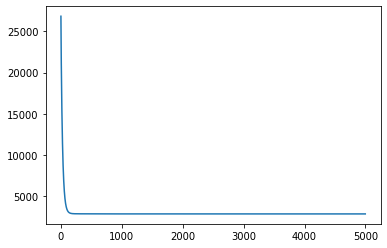

In [133]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [134]:
print(W) 
print(b)

[  37.90357261 -241.96504598  542.43698958  347.70476961 -930.88232545
  517.5898467   163.14386208  275.23025652  735.96720951   48.67525655]
151.34562581243765


In [135]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('► mse: ', mse)

► mse:  2900.150405231308


<br><br>

확인 차 학습률을 0.001로 낮추고, 5만회 반복했다. 출력은 1000회 단위로 실시하였다.

아래에서 보는 바와 같이 이번 경우에도 Loss 2868.5466가 반복된다. 손실값이 최저에 도달했다고 판단한다.

In [137]:
LEARNING_RATE = 0.001

losses02 = []

for i in range(1, 50000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses02.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 2868.5466
Iteration 2000 : Loss 2868.5466
Iteration 3000 : Loss 2868.5466
Iteration 4000 : Loss 2868.5466
Iteration 5000 : Loss 2868.5466
Iteration 6000 : Loss 2868.5466
Iteration 7000 : Loss 2868.5466
Iteration 8000 : Loss 2868.5466
Iteration 9000 : Loss 2868.5466
Iteration 10000 : Loss 2868.5466
Iteration 11000 : Loss 2868.5466
Iteration 12000 : Loss 2868.5466
Iteration 13000 : Loss 2868.5466
Iteration 14000 : Loss 2868.5466
Iteration 15000 : Loss 2868.5466
Iteration 16000 : Loss 2868.5466
Iteration 17000 : Loss 2868.5466
Iteration 18000 : Loss 2868.5466
Iteration 19000 : Loss 2868.5466
Iteration 20000 : Loss 2868.5466
Iteration 21000 : Loss 2868.5466
Iteration 22000 : Loss 2868.5466
Iteration 23000 : Loss 2868.5466
Iteration 24000 : Loss 2868.5466
Iteration 25000 : Loss 2868.5466
Iteration 26000 : Loss 2868.5466
Iteration 27000 : Loss 2868.5466
Iteration 28000 : Loss 2868.5466
Iteration 29000 : Loss 2868.5466
Iteration 30000 : Loss 2868.5466
Iteration 31000 : L

In [138]:
print(W) 
print(b)

[  37.9033407  -241.96513156  542.43618984  347.70502127 -930.92353131
  517.62217511  163.16234434  275.23593501  735.9830025    48.67496248]
151.3456279146185


In [139]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('► mse: ', mse)

► mse:  2900.1520332772925


<br><br>

예측값(pred)과 데이터값(true)을 그래프로 나타내어 비교해보자.

체질량지수(bmi)를 기준으로 하였을 때 양의 선형관계가 나타나며, 예측값을 비교적 유사하게 맞추었음을 알 수 있다.

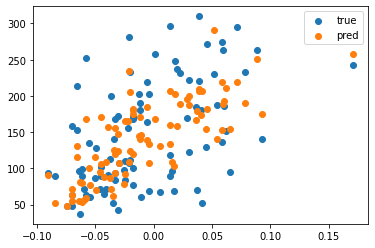

In [140]:
plt.scatter(X_test[:, 2], y_test, label="true")
plt.scatter(X_test[:, 2], prediction, label="pred")
plt.legend()
plt.show()

<br><br><br>

###**3) 라이브러리를 활용한 학습 및 예측**

<br>

라이브러리를 사용해서 동일한 과정을 다시 한 번 수행해 보도록 한다. 앞선 과정에서 예측의 원리와 작동구조를 파악했다면, 이번에는 라이브러리를 활용하는 방법을 익힌다. 각각의 결과도 비교해보도록 하겠다.

scikit-learn에 포함된 선형회귀 모델(LinearRegression)을 사용한다. 모델을 import하고, 학습과 예측을 실시했다.

In [141]:
# 선형회귀 모델 import
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측 실시
predictions = model.predict(X_test)
predictions 


array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

<br><br>

모델 성능평가(mse) 결과, 앞서 측정된 값과 매우 유사한 수치가 나왔다. 직접 함수를 구현한 것과 라이브러리를 활용한 것의 결과값이 유사하다고 볼 수 있다. 

라이브러리의 결과물 역시 시각화 하여 예측값(pred)과 데이터값(true)을 비교해 보도록 한다. 시각화는 상관계수가 높게 나왔던 지표를 중심으로 실시하였다.

In [142]:
# 모델 성능평가
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2900.1732878832318

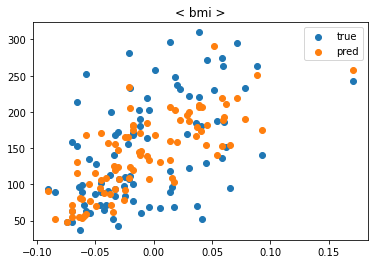

In [143]:
# 시각화01. - 지표: 체질량지수(bmi)
plt.scatter(X_test[:, 2], y_test, label="true")
plt.scatter(X_test[:, 2], predictions, label="pred")
plt.legend()
plt.title('< bmi >')
plt.show()

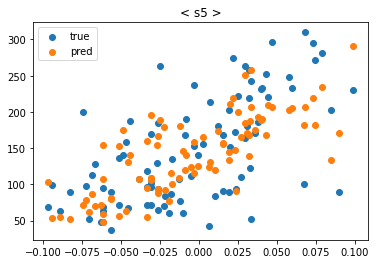

In [144]:
# 시각화02. - 지표: 혈청 내 트리글리세리드(s5)
plt.scatter(X_test[:, 8], y_test, label="true")
plt.scatter(X_test[:, 8], predictions, label="pred")
plt.legend()
plt.title('< s5 >')
plt.show()

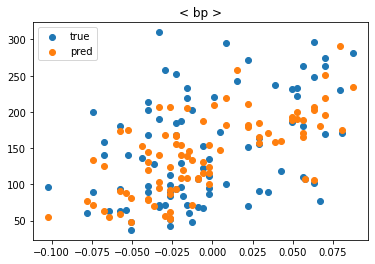

In [145]:
# 시각화03. - 지표: 혈압(bp)
plt.scatter(X_test[:, 3], y_test, label="true")
plt.scatter(X_test[:, 3], predictions, label="pred")
plt.legend()
plt.title('< bp >')
plt.show()

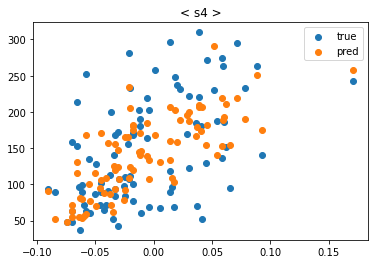

In [146]:
# 시각화04. - 지표: 혈청 내 콜레스트롤(s4)
plt.scatter(X_test[:, 2], y_test, label="true")
plt.scatter(X_test[:, 2], predictions, label="pred")
plt.legend()
plt.title('< s4 >')
plt.show()

<br><br><br>

###**4) 소 결**

<br>

환자 특성을 기준으로 당뇨수치를 예측해 보았다. 나이, 성별, 체질량지수, 혈압, 혈청정보 등 다양한 특성이 데이터셋 내에 포함되어 있었다. 상관계수를 통해 당뇨수치와 뚜렷한 선형관계에 있는 특성을 파악하였으며, 체질량지수(bmi), s5(혈청 내 트리클리세리드 수치), 혈압(bp), s4(혈청 내 콜레스트롤)순으로 상관관계가 높은 것으로 분석되었다.

예측값과 실제 수치 간의 오차를 줄이기 위해 손실함수를 사용하였으며, 학습률 및 반복횟수를 여러 차례 조정해가며 손실을 줄여나가는 과정을 거쳤다. 결과적으로 **MSE**를 **2900**까지 낮출 수 있었다. 

함수를 직접 구현한 경우와 사이킷런을 활용하여 선형회귀를 진행한 두 가지 경우 모두 결과는 유사하게 도출되었다. 각각의 경우를 통해서 손실함수의 개념 및 역할을 익힐 수 있었으며, 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 프로세스를 경험할 수 있었다. 


-

<br><br><br><br><br><br>




---




##**2. 자전거 대여량 예측**


<br><br>

###**1) 데이터 분석**

<br>

두 번째 프로젝트는 Kaggle에서 제공하는 'Bike Sharing Demand' 데이터를 사용한다. 해당 테이터를 로딩하고, 데이터를 변수에 저장한 후 전반적인 내용을 파악했다.  

해당 데이터셋에는 날짜 및 시간, 계절, 휴일여부, 온도, 습도 등의 정보가 담겨있고, 각 일시별 자전거 대여량('count' 컬럼)이 나와있다.  

문제에서 제시한 대로 datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼을 생성한다. 


In [147]:
# 데이터 가져오기
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [148]:
# 자료형 변환 및 컬럼 생성
train['datetime'] = pd.to_datetime(train['datetime'], dayfirst=True)

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<br><br>

별도 컬럼으로 생성한 6가지 정보를 시각화 해보자. 

subplot을 활용하면 한 번에 다수의 그래프 함께 나타낼 수 있다. 총 6개의 그래프를 함께 표현하기 위해 3행2열의 프레임을 설정했다.

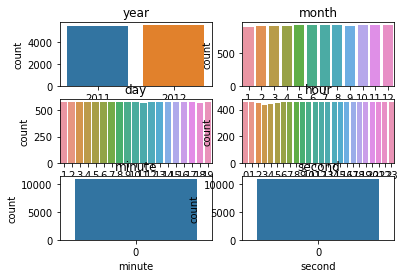

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplot(3, 2, 1)
sns.countplot(x="year", data=train)
plt.title('year')

plt.subplot(3, 2, 2)
sns.countplot(x="month", data=train)
plt.title('month')

plt.subplot(3, 2, 3)
sns.countplot(x="day", data=train)
plt.title('day')

plt.subplot(3, 2, 4)
sns.countplot(x="hour", data=train)
plt.title('hour')

plt.subplot(3, 2, 5)
sns.countplot(x="minute", data=train)
plt.title('minute')

plt.subplot(3, 2, 6)
sns.countplot(x="second", data=train)
plt.title('second')
plt.show()

<br><br>

그래프들 사이의 간격이 좁아서 가독성이 떨어진다. 해결해보자.

아래는 Figure.add_subplot를 사용하여 작성한 그래프다. 지정한 figure에 직접 subplot을 만들어 준다. subplot은 객체로 반환되며, 이를 조작하면 만들어진 subplot을 조정할 수 있다. figsize로 전체적인 그래프 크기를 키울 수 있고, hspace로 간격확대가 가능하다.

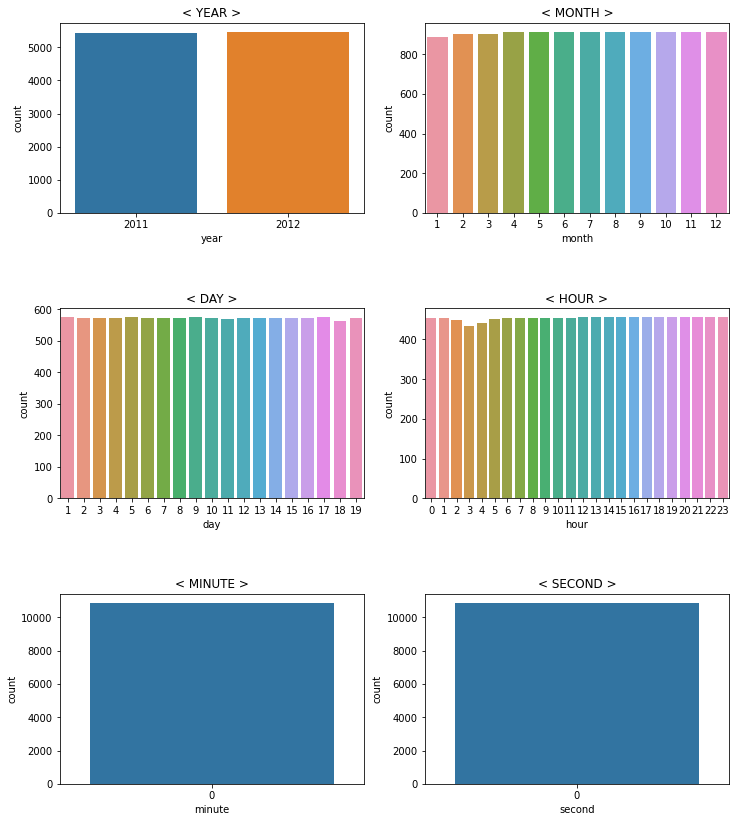

In [150]:
fig = plt.figure(figsize=(12,14))
fig.subplots_adjust(hspace=0.5)

g1 = fig.add_subplot(3, 2, 1)
sns.countplot(x="year", data=train)
plt.title('< YEAR >')

g2 = fig.add_subplot(3, 2, 2)
sns.countplot(x="month", data=train)
plt.title('< MONTH >')

g3 = fig.add_subplot(3, 2, 3)
sns.countplot(x="day", data=train)
plt.title('< DAY >')

g4 = fig.add_subplot(3, 2, 4)
sns.countplot(x="hour", data=train)
plt.title('< HOUR >')

g5 = fig.add_subplot(3, 2, 5)
sns.countplot(x="minute", data=train)
plt.title('< MINUTE >')

g6 = fig.add_subplot(3, 2, 6)
sns.countplot(x="second", data=train)
plt.title('< SECOND >')
plt.show()

<br><br>

학습을 위한 데이터를 셋팅하기에 앞서, 컬럼들 중 불필요한 정보를 지닌 컬럼을 삭제하도록 한다. 

자료를 다시 한 번 확인해 보자. 아직 어떤 데이터가 불필요한지 정확하게 판단하기는 어렵다. 우선 모든 데이터가 결측값으로 판단되는 컬럼(minute, second)은 제거해도 무방하다고 생각된다.

In [151]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


<br><br>

중요한 데이터를 지닌 컬럼은 남기고, 불필요한 데이터는 삭제하기 위해 컬럼별 데이터와 대여량(count)과의 상관관계를 조사해보자.

아래 보는 것과 같이, registered, casual, hour, temp, atemp, humidity 순으로 상관계수가 높게 측정되었다. 단, 여기서 registered는 등록된 사용자의 대여수이고, casual은 등록되지 않은 사용자의 대여수로 실제 대여정보에 해당하므로 제외한다. 시간(hour)과의 상관계수는 0.40으로 양의 선형관계를 나타내며, 온도(temp)와 체감온도(atemp)는 0.39의 상관계수를 보였다. humidity의 상관계수는 -0.32로 음의 선형관계를 나타낸다.

상관관계가 높은 컬럼을 남기되, 자료의 균형을 맞추기 위해 년-월-일 컬럼도 포함하였다.

In [152]:
# 상관관계 조사
print('- season과의 상관관계: \n', np.corrcoef(train["season"], train["count"]), '\n')
print('- holiday과의 상관관계: \n', np.corrcoef(train["holiday"], train["count"]), '\n')
print('- workingday과의 상관관계: \n', np.corrcoef(train["workingday"], train["count"]), '\n')
print('- weather과의 상관관계: \n', np.corrcoef(train["weather"], train["count"]), '\n')
print('- temp과의 상관관계: \n', np.corrcoef(train["temp"], train["count"]), '\n')
print('- atemp과의 상관관계: \n', np.corrcoef(train["atemp"], train["count"]), '\n')
print('- humidity과의 상관관계: \n', np.corrcoef(train["humidity"], train["count"]), '\n')
print('- windspeed과의 상관관계: \n', np.corrcoef(train["windspeed"], train["count"]), '\n')
print('- casual과의 상관관계: \n', np.corrcoef(train["casual"], train["count"]), '\n')
print('- registered과의 상관관계: \n', np.corrcoef(train["registered"], train["count"]), '\n')
print('- year과의 상관관계: \n', np.corrcoef(train["year"], train["count"]), '\n')
print('- month과의 상관관계: \n', np.corrcoef(train["month"], train["count"]), '\n')
print('- day과의 상관관계: \n', np.corrcoef(train["day"], train["count"]), '\n')
print('- hour과의 상관관계: \n', np.corrcoef(train["hour"], train["count"]))

- season과의 상관관계: 
 [[1.         0.16343902]
 [0.16343902 1.        ]] 

- holiday과의 상관관계: 
 [[ 1.         -0.00539298]
 [-0.00539298  1.        ]] 

- workingday과의 상관관계: 
 [[1.         0.01159387]
 [0.01159387 1.        ]] 

- weather과의 상관관계: 
 [[ 1.        -0.1286552]
 [-0.1286552  1.       ]] 

- temp과의 상관관계: 
 [[1.         0.39445364]
 [0.39445364 1.        ]] 

- atemp과의 상관관계: 
 [[1.         0.38978444]
 [0.38978444 1.        ]] 

- humidity과의 상관관계: 
 [[ 1.         -0.31737148]
 [-0.31737148  1.        ]] 

- windspeed과의 상관관계: 
 [[1.         0.10136947]
 [0.10136947 1.        ]] 

- casual과의 상관관계: 
 [[1.         0.69041357]
 [0.69041357 1.        ]] 

- registered과의 상관관계: 
 [[1.         0.97094811]
 [0.97094811 1.        ]] 

- year과의 상관관계: 
 [[1.        0.2604033]
 [0.2604033 1.       ]] 

- month과의 상관관계: 
 [[1.         0.16686223]
 [0.16686223 1.        ]] 

- day과의 상관관계: 
 [[1.         0.01982578]
 [0.01982578 1.        ]] 

- hour과의 상관관계: 
 [[1.         0.40060119]
 [0.40060119

In [153]:
# X, y 컬럼 선택
column = ['temp', 'atemp', 'humidity', 'year', 'month', 'day', 'hour']
X = train[column]
y = train['count']
print(X.head())

   temp   atemp  humidity  year  month  day  hour
0  9.84  14.395        81  2011      1    1     0
1  9.02  13.635        80  2011      1    1     1
2  9.02  13.635        80  2011      1    1     2
3  9.84  14.395        75  2011      1    1     3
4  9.84  14.395        75  2011      1    1     4


<br><br>

###**2) 학습 및 예측**

<br>

학습을 위해 데이터를 분리하고, LinearRegression model을 활용하여 학습을 실시한다.

학습된 모델을 Test 하고, 예측값을 도출한다. mse와 rmse를 계산하여 오차를 측정했다. 결과는 다음과 같다.

In [154]:
# train/test 데이터 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

(8708, 7) (8708,)
(2178, 7) (2178,)


LinearRegression()

In [155]:
# 예측값 출력 및 손실함수값 계산
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = (mse)**(1/2)
print('► MSE: ', mse)
print('► RMSE: ', rmse)

► MSE:  19977.71364383958
► RMSE:  141.34254010679015


<br><br>

시각화를 통해 예측의 타당성을 분석해보자. 유의미한 관계에 있는 지표를 중심으로 그래프를 작성했다.

아래의 그래프를 살펴보면, 선형의 관계가 뚜렷한 지점에서 예측이 잘 맞았다. 실제 데이터 값이 경향성을 벗어나는 지점일수록 예측이 어려웠음을 알 수 있다.

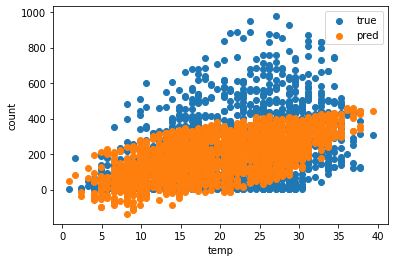

In [156]:
# 예측결과 시각화: Temp 기준
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="pred")
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

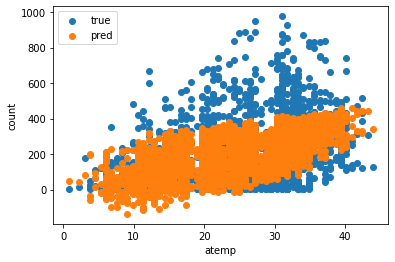

In [157]:
# 예측결과 시각화: Atemp 기준
plt.scatter(X_test['atemp'], y_test, label="true")
plt.scatter(X_test['atemp'], predictions, label="pred")
plt.xlabel('atemp')
plt.ylabel('count')
plt.legend()
plt.show()

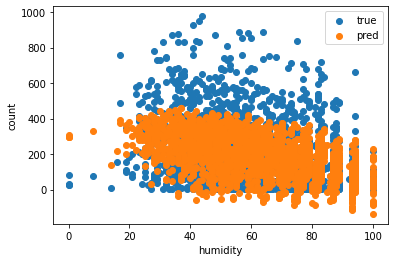

In [158]:
# 예측결과 시각화: Humidity 기준
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()

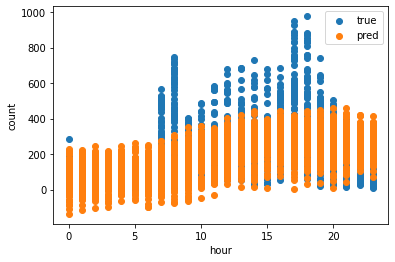

In [159]:
# 예측결과 시각화: Hour 기준
plt.scatter(X_test['hour'], y_test, label="true")
plt.scatter(X_test['hour'], predictions, label="pred")
plt.xlabel('hour')
plt.ylabel('count')
plt.legend()
plt.show()

<br><br>

###**3) 소 결**

<br>

데이터의 특징과 상관관계에 따라 특정 컬럼을 선택하거나 삭제하는 과정이 예측률에 영향을 미쳤다. 모델의 성능을 높이기 위해 데이터를 가감해가면서 결과를 비교하였고, 적정 셋팅을 찾아 **RMSE** 값을 **141**까지 낮출 수 있었다. 

결과를 시각화하여 예측의 타당성을 분석한 결과, 선형의 관계가 뚜렷한 지점에서 예측이 잘 맞았고, 경향성을 벗어나는 지점일수록 예측이 어려웠다. 

시각화한 자료를 통해 결과를 직관적으로 이해하는 데 도움이 되었다. 다만, 이를 해석하는 데에 있어 다양한 관점이 있을 수 있고, 관점에 따라 동일한 그래프에 대해서도 결론이 조금씩 달라질 수 있겠다는 생각이 들었다. 객관성을 유지하며 그래프가 지닌 함의를 읽어내기 위한 맥락적 이해와 경험이 필요하겠다.

-

<br><br><br><br><br><br>




---

# **III. 결 론**

<br>

####**[ 맺음말 ]**

변수 간의 상관관계를 기반으로 예측모델의 성능을 향상할 수 있는 데이터를 셋팅하는 것이 중요함을 깨달았다. 결국 데이터셋을 얼마나 정확히 이해하느냐가 셋팅의 방향을 좌우할 것이고, 이것이 문제해결에 주요한 키가 될 수 있다.

또한, 손실(loss)을 줄여나가는 것은 예측의 정확도를 높이는 데에 중요한 과정임을 경험했다. 미분을 통해 손실의 최소값을 찾아나가는 방법을 활용할 수 있으며, 이때 손실함수의 기울기가 척도가 된다.

프로젝트를 진행하며 결과값에 따라 데이터 셋팅이나 하이퍼파라미터를 조정하고, 이에 따른 변화를 피드백하는 과정을 여러차례 거쳤다. 시행착오를 통해 예측정확도를 높여갈 수 있었으며, 결과값을 그래프로 시각화하여 진행과정의 적정성 및 추가적으로 필요한 과정이 무엇인지를 파악할 수 있었다.

<br>

다만, 실제 데이터에 비해 비교적 단순한 간이 데이터를 가지고 예측을 수행했음에도 도출된 결과를 어떻게 해석해야하는지에 대한 어려움이 컸다. 수치는 계산되어 나오지만 그 해석은 오롯이 나의 몫이었다. 자칫하면 정량적 예측값을 지나치게 단순화하여 판단하거나, 시각화 자료를 곡해하여 분석의 객관성을 잃을 수도 있겠다는 우려가 들었다. 

결론을 내리기에 앞서 전체 맥락을 이해하고 총체적인 관점에서 다시 한 번 분석내용을 살펴볼 필요가 있음을 느꼈다.

<br>

####**[ 향후 과제 ]**

시각화 결과에 대한 타당한 해석을 돕는 보조적인 지표나 인자들이 무엇인지 파악하고, 이를 구현하는 방법을 숙지한다면 보다 설득력있는 결론을 내릴 수 있을 것이다.

또한, 이번 프로젝트에서는 상관계수를 토대로 변수 간 단순 상관관계를 파악하고 데이터 셋팅의 근거로 활용하였으나, 유의성 검증 등을 거쳐 관계성을 구체화하고 분석의 신뢰도를 높일 필요가 있다.




            
<br><br><br>



---

<br>

    < 참고문헌 >

        [1] ⌈밑바닥부터 시작하는 딥러닝⌋, 한빛미디어, 사이토고키 지음
        [2] Forecasting: Principles and Practice, https://otexts.com/fppkr
        [2] https://en.wikipedia.org/wiki/Forecasting



<br><br>


